In [11]:
import pandas as pd
import numpy as np

In [12]:
import os

In [13]:
path = os.path.join('student', 'student-mat.csv')

In [16]:
ds = pd.read_csv(path, sep=";")

In [17]:
ds

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [18]:
temp = ds.copy()

In [19]:
temp.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [20]:
temp.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [23]:
temp = temp[['studytime', 'failures','schoolsup', 'paid','absences','G1', 'G2','G3']]

In [27]:
temp.head()

,studytime,failures,schoolsup,paid,absences,G1,G2,G3
0,2,0,yes,no,6,5,6,6
1,2,0,no,no,4,5,5,6
2,2,3,yes,yes,10,7,8,10
3,3,0,no,yes,2,15,14,15
4,2,0,no,yes,4,6,10,10


In [28]:
predict = temp['G3']

In [36]:
temp

,studytime,failures,schoolsup,paid,absences,G1,G2
0,2,0,yes,no,6,5,6
1,2,0,no,no,4,5,5
2,2,3,yes,yes,10,7,8
3,3,0,no,yes,2,15,14
4,2,0,no,yes,4,6,10
...,...,...,...,...,...,...,...
390,2,2,no,yes,11,9,9
391,1,0,no,no,3,14,16
392,1,3,no,no,3,10,8
393,1,0,no,no,0,11,12


In [37]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   studytime  395 non-null    int64 
 1   failures   395 non-null    int64 
 2   schoolsup  395 non-null    object
 3   paid       395 non-null    object
 4   absences   395 non-null    int64 
 5   G1         395 non-null    int64 
 6   G2         395 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 21.7+ KB


In [41]:
import sklearn

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
temp.schoolsup = le.fit_transform(temp.schoolsup)

C:\Users\Prasanth\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
temp.paid = le.fit_transform(temp.paid)

C:\Users\Prasanth\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [49]:
temp

,studytime,failures,schoolsup,paid,absences,G1,G2
0,2,0,1,0,6,5,6
1,2,0,0,0,4,5,5
2,2,3,1,1,10,7,8
3,3,0,0,1,2,15,14
4,2,0,0,1,4,6,10
...,...,...,...,...,...,...,...
390,2,2,0,1,11,9,9
391,1,0,0,0,3,14,16
392,1,3,0,0,3,10,8
393,1,0,0,0,0,11,12


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [52]:
X = np.array(temp)
y = np.array(predict)

In [55]:
X,y

(array([[ 2,  0,  1, ...,  6,  5,  6],
        [ 2,  0,  0, ...,  4,  5,  5],
        [ 2,  3,  1, ..., 10,  7,  8],
        ...,
        [ 1,  3,  0, ...,  3, 10,  8],
        [ 1,  0,  0, ...,  0, 11, 12],
        [ 1,  0,  0, ...,  5,  8,  9]], dtype=int64),
 array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
        10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
        15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
        13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
         8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
         8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
        14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
        13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
         0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
         0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7

In [54]:
#splitting into test and training data
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
X_train, y_train

(array([[ 2,  0,  1, ...,  6,  5,  6],
        [ 1,  0,  0, ...,  8,  9,  9],
        [ 2,  0,  0, ...,  4, 12, 13],
        ...,
        [ 2,  1,  0, ...,  0, 15, 12],
        [ 2,  0,  0, ..., 14, 13, 13],
        [ 1,  0,  0, ..., 20, 13, 12]], dtype=int64),
 array([ 6, 10, 13,  8, 14,  9, 10,  8, 16,  4,  0,  0, 12, 14, 12, 18, 10,
         8, 16, 14, 13, 12, 13, 10, 10, 10, 10, 18, 14,  9, 10,  5, 12, 14,
        13, 10, 15, 10, 16, 14,  0,  8, 10, 13, 14, 10,  0, 10, 10, 10,  0,
        11,  8,  9, 11,  8, 13,  6, 15, 10,  9, 15, 14,  0, 17,  9,  0, 10,
        10, 11,  7,  6, 19, 10, 19, 11,  5,  7, 10, 15,  7,  9, 17, 11, 17,
        18, 10, 11, 14,  8, 13,  0, 12, 10, 11,  8,  7, 11, 16, 11, 16,  0,
        18,  6, 10, 12, 11,  8, 13,  8,  8, 12, 12, 14,  0,  8, 10, 11,  7,
        12, 15,  0, 18, 14, 16, 10, 15, 12, 12, 12,  6, 12, 10, 10,  7, 19,
        11, 14, 13,  8, 16, 11,  8, 12, 13, 18, 11, 14,  8, 14, 11, 11, 11,
        12, 10,  9, 12,  9, 11, 10,  6,  8,  0, 11, 12

In [81]:
model = model.fit(X_train, y_train)

In [82]:
predicted_values = model.predict(X_test)

In [116]:
print("Accuracy of the Model: {}%".format(model.score(X_test, y_test)*100))

Accuracy of the Model: 77.64802455307559%


Text(0.5, 0, 'Actual')

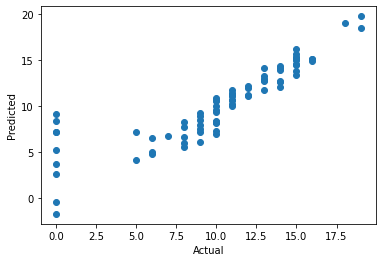

In [117]:
#plotting..
from matplotlib import pyplot as plt
plt.scatter(y_test, predicted_values)
plt.ylabel("Predicted")
plt.xlabel("Actual")